This script reproduces the [official tutorial of HDDM](http://ski.clps.brown.edu/hddm_docs/tutorial_python.html) by the HDDM (0.9.*) in this docker image.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import hddm
import kabuki
print(hddm.__version__)

0.9.5


## Loading data

In [3]:
data = hddm.load_csv(hddm.__path__[0] + '/examples/cavanagh_theta_nn.csv')
data.head()

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.21,1.0,0.656275,1,HC
1,0,WL,1.63,1.0,-0.327889,1,LC
2,0,WW,1.03,1.0,-0.480285,1,HC
3,0,WL,2.77,1.0,1.927427,1,LC
4,0,WW,1.14,0.0,-0.213236,1,HC


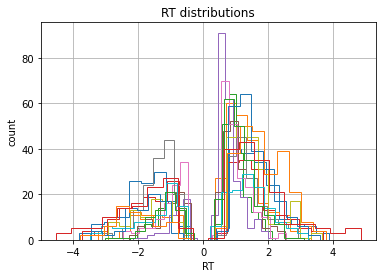

In [4]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# plt.savefig('hddm_demo_fig_00.pdf')

Check number of trials of each condition for each participant.

In [5]:
data.groupby(['subj_idx', 'stim']).size()

subj_idx  stim
0         LL       73
          WL      151
          WW       74
1         LL       74
          WL      153
          WW       71
2         LL       73
          WL      147
          WW       73
3         LL       62
          WL      129
          WW       64
4         LL       70
          WL      144
          WW       69
5         LL       77
          WL      155
          WW       71
6         LL       73
          WL      154
          WW       72
7         LL       77
          WL      142
          WW       75
8         LL       74
          WL      148
          WW       71
9         LL       53
          WL      110
          WW       54
10        LL       76
          WL      157
          WW       76
11        LL       73
          WL      153
          WW       79
12        LL       61
          WL      138
          WW       68
13        LL       68
          WL      135
          WW       71
dtype: int64

## Fitting a hierarchical model

Note that there will be a lot of warnings about data type and `frame.append` method, but it still works. Also, the latest HDDM has changes a lot for the `HDDMnn` function, when running the older function `HDDM`, it will remind you that  `No model attribute --> setting up standard HDDM` `Set model to ddm`.This is normal.

In [6]:
# Instantiate model object passing it our data (no need to call flip_errors() before passing it).
# This will tailor an individual hierarchical DDM around your dataset.
m1 = hddm.HDDM(data)
# find a good starting point which helps with the convergence.
m1.find_starting_values()
# start drawing 7000 samples and discarding 5000 as burn-in
m1.sample(2000, burn=500)

No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

 [-----------------100%-----------------] 2000 of 2000 complete in 119.0 sec

In [7]:
stats = m1.gen_stats()
stats[stats.index.isin(['a', 'a_std', 'a_subj.0', 'a_subj.1'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.976136,0.096759,1.792486,1.915594,1.970186,2.034643,2.190138,0.002713
a_std,0.344407,0.083771,0.220168,0.285696,0.331525,0.387222,0.541183,0.003028
a_subj.0,2.19892,0.064477,2.075554,2.154847,2.20003,2.241821,2.326454,0.002165
a_subj.1,2.11516,0.068775,1.985735,2.064581,2.115725,2.16148,2.256888,0.002498


Plotting a
Plotting a_std
Plotting v
Plotting t


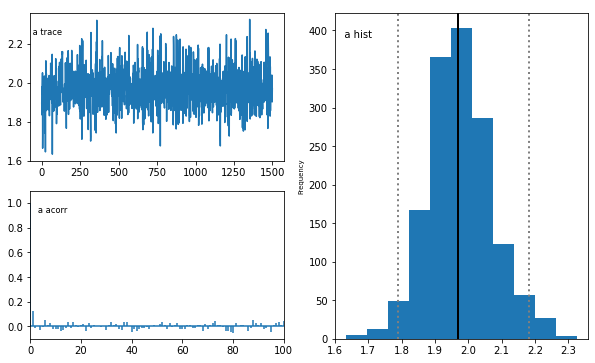

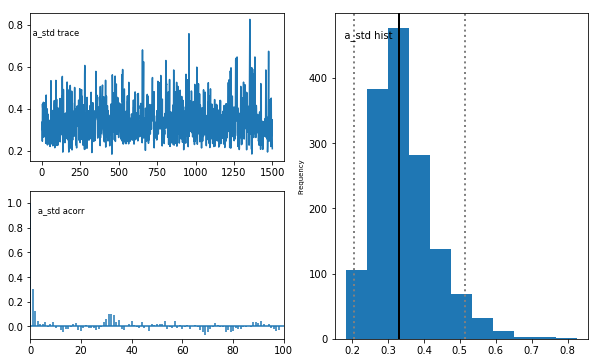

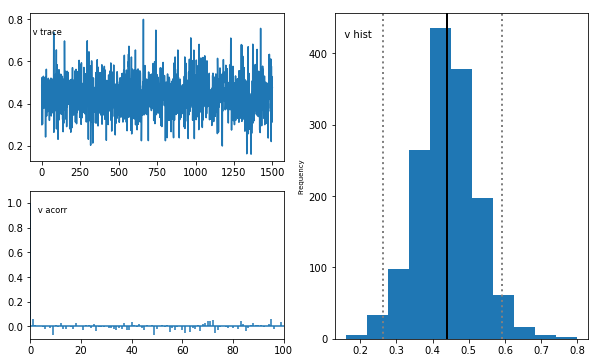

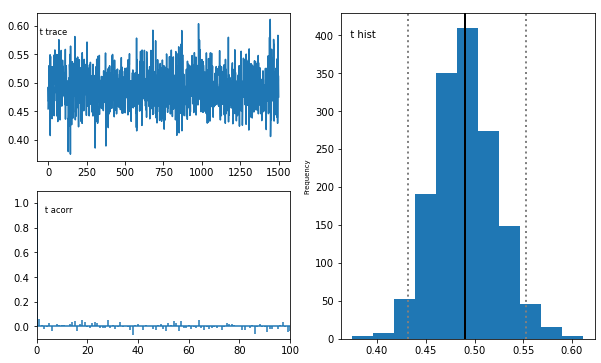

In [8]:
m1.plot_posteriors(['a', 't', 'v', 'a_std'])

## Calculate Gelman_rubin r hat.

The original tutorial used `for` loop:

In [9]:
# models = []
# for i in range(5):
#     m = hddm.HDDM(data)
#     m.find_starting_values()
#     m.sample(5000, burn=20)
#     models.append(m)

# hddm.analyze.gelman_rubin(models)

Here, we replace the `for` loop with parallel processing:

In [10]:
# parallel processing related packages
from p_tqdm import p_map
from functools import partial

In [11]:
def ms1(id, data=None, samples=None, burn=None, save_name="cavanagh2011_m1"): 

    print('running model%i'%id);
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    m = hddm.HDDM(data)
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # it's neccessary to save the model data
    m.save(mname)
    
    return m

In [12]:
samples = 5000  # Cavanagh used 30,000 and 10, 000 burn.
burn = 1000    
thin = 1
chains = 4

In [13]:
models_1 = p_map(partial(ms1, data=data, samples=samples, burn=burn),
                 range(chains)) # progess bar is a mess ;(

running model0
No model attribute --> setting up standard HDDM
Set model to ddm
running model1
No model attribute --> setting up standard HDDM

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)



Set model to ddm


  0%|          | 0/4 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)


running model2
No model attribute --> setting up standard HDDM


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)


Set model to ddm


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)


running model3


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)


No model attribute --> setting up standard HDDM


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)


Set model to ddm


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.appen

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_el

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_el

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

 -                 3%                  ] 169 of 5000 complete in 15.1 sec                  0%                  ] 7 of 5000 complete in 0.6 sec [                  0%                  ] 7 of 5000 complete in 0.5 sec[                  0%                  ] 7 of 5000 complete in 0.6 sec[                  0%                  ] 14 of 5000 complete in 1.1 sec[                  0%                  ] 12 of 5000 complete in 1.1 sec[                  0%                  ] 13 of 5000 complete in 1.1 sec[                  0%                  ] 13 of 5000 complete in 1.1 sec[                  0%                  ] 20 of 5000 complete in 1.6 sec[                  0%                  ] 18 of 5000 complete in 1.6 sec[                  0%                  ] 19 of 5000 complete in 1.7 sec[                  0%                  ] 19 of 5000 complete in 1.7 sec[                  0%                  ] 26 of 5000 complete in 2.2 sec[                  0%                  ] 24 of 5000 complete in 2.2 sec[      

 [-                 3%                  ] 176 of 5000 complete in 16.1 sec[-                 3%                  ] 168 of 5000 complete in 16.1 sec[-                 3%                  ] 177 of 5000 complete in 16.3 sec[-                 3%                  ] 186 of 5000 complete in 16.7 sec[-                 3%                  ] 182 of 5000 complete in 16.6 sec[-                 3%                  ] 174 of 5000 complete in 16.6 sec[-                 3%                  ] 183 of 5000 complete in 16.9 sec[-                 3%                  ] 191 of 5000 complete in 17.2 sec[-                 3%                  ] 188 of 5000 complete in 17.1 sec[-                 3%                  ] 180 of 5000 complete in 17.2 sec[-                 3%                  ] 189 of 5000 complete in 17.4 sec[-                 3%                  ] 196 of 5000 complete in 17.7 sec[-                 3%                  ] 194 of 5000 complete in 17.7 sec[-                 3%                  ] 186 of 50

 ---              10%                  ] 503 of 5000 complete in 46.5 secc[--                6%                  ] 346 of 5000 complete in 31.8 sec[--                6%                  ] 347 of 5000 complete in 31.8 sec[--                6%                  ] 343 of 5000 complete in 31.8 sec[--                6%                  ] 339 of 5000 complete in 31.9 sec[--                7%                  ] 352 of 5000 complete in 32.4 sec[--                7%                  ] 353 of 5000 complete in 32.3 sec[--                6%                  ] 349 of 5000 complete in 32.4 sec[--                6%                  ] 346 of 5000 complete in 32.4 sec[--                7%                  ] 358 of 5000 complete in 32.9 sec[--                7%                  ] 354 of 5000 complete in 32.9 sec[--                7%                  ] 359 of 5000 complete in 32.9 sec[--                7%                  ] 352 of 5000 complete in 33.0 sec[--                7%                  ] 365 of 50

 -----            13%                  ] 684 of 5000 complete in 63.2 secc[---              10%                  ] 515 of 5000 complete in 47.6 sec[---              10%                  ] 515 of 5000 complete in 47.7 sec [---              10%                  ] 524 of 5000 complete in 48.1 sec  [----             10%                  ] 527 of 5000 complete in 48.4 sec[---              10%                  ] 520 of 5000 complete in 48.2 sec[----             10%                  ] 532 of 5000 complete in 48.9 sec [---              10%                  ] 526 of 5000 complete in 48.7 sec[---              10%                  ] 526 of 5000 complete in 48.8 sec[----             10%                  ] 536 of 5000 complete in 49.2 sec[----             10%                  ] 532 of 5000 complete in 49.3 sec  [----             10%                  ] 537 of 5000 complete in 49.5 sec[----             10%                  ] 532 of 5000 complete in 49.3 sec[----             10%                  ] 540

 ------           16%                  ] 815 of 5000 complete in 75.4 sec [-----            13%                  ] 690 of 5000 complete in 63.7 sec[-----            13%                  ] 689 of 5000 complete in 63.9 sec[-----            13%                  ] 696 of 5000 complete in 64.3 sec [-----            13%                  ] 697 of 5000 complete in 64.3 sec[-----            13%                  ] 695 of 5000 complete in 64.5 sec[-----            14%                  ] 703 of 5000 complete in 64.8 sec[-----            14%                  ] 702 of 5000 complete in 64.8 sec[-----            13%                  ] 698 of 5000 complete in 65.1 sec[-----            14%                  ] 700 of 5000 complete in 65.0 sec [-----            14%                  ] 709 of 5000 complete in 65.3 sec[-----            14%                  ] 704 of 5000 complete in 65.7 sec[-----            14%                  ] 706 of 5000 complete in 65.5 sec[-----            14%                  ] 714 of 

 -------          20%                  ] 1020 of 5000 complete in 94.8 sec[------           17%                  ] 856 of 5000 complete in 79.9 sec[------           17%                  ] 867 of 5000 complete in 80.1 sec[------           17%                  ] 864 of 5000 complete in 80.5 sec[------           17%                  ] 870 of 5000 complete in 80.3 sec[------           17%                  ] 862 of 5000 complete in 80.4 sec[------           17%                  ] 873 of 5000 complete in 80.6 sec[------           17%                  ] 869 of 5000 complete in 81.0 sec  [------           17%                  ] 876 of 5000 complete in 80.9 sec[------           17%                  ] 868 of 5000 complete in 80.9 sec[------           17%                  ] 879 of 5000 complete in 81.1 sec[------           17%                  ] 874 of 5000 complete in 81.5 sec[------           17%                  ] 882 of 5000 complete in 81.4 sec[------           17%                  ] 875 of 

 --------         22%                  ] 1147 of 5000 complete in 106.0 sec[-------          20%                  ] 1041 of 5000 complete in 95.9 sec[-------          20%                  ] 1038 of 5000 complete in 96.3 sec[-------          20%                  ] 1036 of 5000 complete in 96.2 sec[-------          20%                  ] 1047 of 5000 complete in 96.2 sec[-------          20%                  ] 1047 of 5000 complete in 96.4 sec[-------          20%                  ] 1043 of 5000 complete in 96.8 sec[-------          20%                  ] 1042 of 5000 complete in 96.7 sec[--------         21%                  ] 1053 of 5000 complete in 96.7 sec[--------         21%                  ] 1053 of 5000 complete in 97.0 sec[-------          20%                  ] 1049 of 5000 complete in 97.3 sec[-------          20%                  ] 1047 of 5000 complete in 97.2 sec[--------         21%                  ] 1059 of 5000 complete in 97.3 sec[--------         21%                

 ----------       26%                  ] 1324 of 5000 complete in 121.7 secc[---------        24%                  ] 1206 of 5000 complete in 111.2 sec[---------        24%                  ] 1207 of 5000 complete in 111.4 sec[---------        24%                  ] 1213 of 5000 complete in 111.4 sec[---------        24%                  ] 1213 of 5000 complete in 111.5 sec[---------        24%                  ] 1212 of 5000 complete in 111.7 sec[---------        24%                  ] 1213 of 5000 complete in 112.0 sec[---------        24%                  ] 1219 of 5000 complete in 111.9 sec[---------        24%                  ] 1219 of 5000 complete in 112.0 sec[---------        24%                  ] 1218 of 5000 complete in 112.3 sec[---------        24%                  ] 1219 of 5000 complete in 112.5 sec[---------        24%                  ] 1224 of 5000 complete in 112.5 sec[---------        24%                  ] 1225 of 5000 complete in 112.6 sec[---------        24%   

 -----------      29%                  ] 1495 of 5000 complete in 137.0 secc[----------       27%                  ] 1378 of 5000 complete in 126.5 sec[----------       27%                  ] 1370 of 5000 complete in 126.5 sec[----------       27%                  ] 1383 of 5000 complete in 126.6 sec[----------       27%                  ] 1377 of 5000 complete in 126.6 sec[----------       27%                  ] 1384 of 5000 complete in 127.0 sec[----------       27%                  ] 1376 of 5000 complete in 127.0 sec[----------       27%                  ] 1389 of 5000 complete in 127.2 sec[----------       27%                  ] 1383 of 5000 complete in 127.2 sec[----------       27%                  ] 1391 of 5000 complete in 127.6 sec[----------       27%                  ] 1382 of 5000 complete in 127.6 sec[----------       27%                  ] 1395 of 5000 complete in 127.7 sec[----------       27%                  ] 1388 of 5000 complete in 127.7 sec[----------       27%   

 ------------     33%                  ] 1687 of 5000 complete in 154.9 secc[-----------      30%                  ] 1546 of 5000 complete in 141.8 sec[-----------      30%                  ] 1542 of 5000 complete in 141.7 sec[-----------      30%                  ] 1536 of 5000 complete in 141.8 sec[-----------      30%                  ] 1545 of 5000 complete in 141.9 sec[-----------      31%                  ] 1552 of 5000 complete in 142.3 sec[-----------      30%                  ] 1542 of 5000 complete in 142.3 sec[-----------      30%                  ] 1549 of 5000 complete in 142.3 sec[-----------      31%                  ] 1550 of 5000 complete in 142.5 sec[-----------      31%                  ] 1559 of 5000 complete in 142.9 sec[-----------      30%                  ] 1548 of 5000 complete in 142.9 sec[-----------      31%                  ] 1556 of 5000 complete in 142.9 sec[-----------      31%                  ] 1555 of 5000 complete in 143.0 sec[-----------      31%   

 -------------    36%                  ] 1814 of 5000 complete in 167.0 secc[-------------    34%                  ] 1712 of 5000 complete in 157.1 sec[------------     33%                  ] 1694 of 5000 complete in 157.0 sec[------------     34%                  ] 1706 of 5000 complete in 157.0 sec[------------     34%                  ] 1710 of 5000 complete in 157.1 sec[-------------    34%                  ] 1719 of 5000 complete in 157.6 sec [-------------    34%                  ] 1711 of 5000 complete in 157.5 sec[-------------    34%                  ] 1716 of 5000 complete in 157.6 sec[-------------    34%                  ] 1726 of 5000 complete in 158.1 sec[------------     34%                  ] 1704 of 5000 complete in 158.0 sec[-------------    34%                  ] 1717 of 5000 complete in 158.1 sec[-------------    34%                  ] 1721 of 5000 complete in 158.1 sec[------------     34%                  ] 1709 of 5000 complete in 158.5 sec[-------------    34%  

 ---------------  40%                  ] 2013 of 5000 complete in 186.6 secc[--------------   37%                  ] 1879 of 5000 complete in 172.2 sec[--------------   37%                  ] 1870 of 5000 complete in 172.4 sec[--------------   37%                  ] 1874 of 5000 complete in 172.4 sec[--------------   37%                  ] 1855 of 5000 complete in 172.5 sec[--------------   37%                  ] 1885 of 5000 complete in 172.7 sec[--------------   37%                  ] 1875 of 5000 complete in 172.9 sec[--------------   37%                  ] 1881 of 5000 complete in 173.0 sec[--------------   37%                  ] 1861 of 5000 complete in 173.1 sec[--------------   37%                  ] 1892 of 5000 complete in 173.3 sec[--------------   37%                  ] 1881 of 5000 complete in 173.5 sec[--------------   37%                  ] 1886 of 5000 complete in 173.5 sec[--------------   37%                  ] 1867 of 5000 complete in 173.6 sec[--------------   37%   

 ---------------  41%                  ] 2059 of 5000 complete in 189.4 secc[---------------  40%                  ] 2047 of 5000 complete in 188.0 sec[---------------  40%                  ] 2033 of 5000 complete in 188.2 sec[---------------  40%                  ] 2042 of 5000 complete in 188.3 sec[---------------  40%                  ] 2048 of 5000 complete in 188.3 sec[---------------  41%                  ] 2053 of 5000 complete in 188.5 sec[---------------  40%                  ] 2048 of 5000 complete in 188.8 sec[---------------  40%                  ] 2040 of 5000 complete in 188.8 sec[---------------  41%                  ] 2060 of 5000 complete in 189.0 sec[---------------  41%                  ] 2054 of 5000 complete in 188.8 sec[---------------  41%                  ] 2054 of 5000 complete in 189.4 sec [---------------  41%                  ] 2067 of 5000 complete in 189.6 sec[---------------  40%                  ] 2046 of 5000 complete in 189.4 sec[---------------  41%  

 [---------------- 44%                  ] 2221 of 5000 complete in 202.9 sec[-----------------45%                  ] 2252 of 5000 complete in 203.3 sec[---------------- 44%                  ] 2217 of 5000 complete in 203.2 sec[-----------------44%                  ] 2239 of 5000 complete in 203.3 sec[---------------- 44%                  ] 2231 of 5000 complete in 203.4 sec[-----------------45%                  ] 2262 of 5000 complete in 203.8 sec[---------------- 44%                  ] 2226 of 5000 complete in 203.7 sec[-----------------44%                  ] 2249 of 5000 complete in 203.9 sec[-----------------44%                  ] 2242 of 5000 complete in 204.0 sec[-----------------45%                  ] 2272 of 5000 complete in 204.3 sec[---------------- 44%                  ] 2236 of 5000 complete in 204.2 sec[-----------------45%                  ] 2258 of 5000 complete in 204.4 sec[-----------------45%                  ] 2252 of 5000 complete in 204.5 sec[-----------------45%   

 [-----------------49%                  ] 2475 of 5000 complete in 217.6 sec[-----------------50%                  ] 2518 of 5000 complete in 217.9 sec[-----------------49%                  ] 2493 of 5000 complete in 217.7 sec[-----------------49%                  ] 2491 of 5000 complete in 217.8 sec[-----------------49%                  ] 2484 of 5000 complete in 218.1 sec[-----------------50%                  ] 2528 of 5000 complete in 218.4 sec[-----------------50%                  ] 2503 of 5000 complete in 218.2 sec[-----------------50%                  ] 2501 of 5000 complete in 218.4 sec[-----------------49%                  ] 2493 of 5000 complete in 218.6 sec[-----------------50%                  ] 2537 of 5000 complete in 218.9 sec[-----------------50%                  ] 2513 of 5000 complete in 218.7 sec[-----------------50%                  ] 2510 of 5000 complete in 218.9 sec[-----------------50%                  ] 2503 of 5000 complete in 219.1 sec[-----------------50%   

 -----------------58%--                ] 2946 of 5000 complete in 243.4 secc[-----------------55%                  ] 2754 of 5000 complete in 232.0 sec[-----------------54%                  ] 2744 of 5000 complete in 232.3 sec[-----------------55%-                 ] 2785 of 5000 complete in 232.6 sec[-----------------55%                  ] 2758 of 5000 complete in 232.5 sec[-----------------55%-                 ] 2764 of 5000 complete in 232.5 sec[-----------------55%                  ] 2754 of 5000 complete in 232.9 sec[-----------------55%-                 ] 2795 of 5000 complete in 233.1 sec[-----------------55%-                 ] 2768 of 5000 complete in 233.0 sec[-----------------55%-                 ] 2774 of 5000 complete in 233.1 sec[-----------------56%-                 ] 2805 of 5000 complete in 233.6 sec[-----------------55%-                 ] 2764 of 5000 complete in 233.4 sec[-----------------55%-                 ] 2778 of 5000 complete in 233.5 sec[-----------------55%-  

 -----------------64%----              ] 3209 of 5000 complete in 257.8 secc[-----------------60%--                ] 3020 of 5000 complete in 246.7 sec[-----------------60%---               ] 3027 of 5000 complete in 246.8 sec[-----------------60%--                ] 3014 of 5000 complete in 247.1 sec[-----------------61%---               ] 3056 of 5000 complete in 247.4 sec[-----------------60%---               ] 3030 of 5000 complete in 247.3 sec[-----------------60%---               ] 3037 of 5000 complete in 247.3 sec[-----------------60%--                ] 3024 of 5000 complete in 247.6 sec[-----------------61%---               ] 3066 of 5000 complete in 247.9 sec[-----------------60%---               ] 3040 of 5000 complete in 247.8 sec[-----------------60%---               ] 3047 of 5000 complete in 247.8 sec[-----------------60%---               ] 3034 of 5000 complete in 248.2 sec[-----------------61%---               ] 3076 of 5000 complete in 248.4 sec[-----------------61%---

 [-----------------65%-----             ] 3293 of 5000 complete in 261.4 sec[-----------------66%-----             ] 3319 of 5000 complete in 261.6 sec[-----------------65%----              ] 3278 of 5000 complete in 261.5 sec[-----------------65%-----             ] 3297 of 5000 complete in 261.6 sec[-----------------66%-----             ] 3302 of 5000 complete in 261.9 sec[-----------------66%-----             ] 3329 of 5000 complete in 262.1 sec[-----------------65%----              ] 3288 of 5000 complete in 262.0 sec[-----------------66%-----             ] 3307 of 5000 complete in 262.1 sec[-----------------66%-----             ] 3312 of 5000 complete in 262.4 sec[-----------------66%-----             ] 3339 of 5000 complete in 262.7 sec[-----------------65%-----             ] 3298 of 5000 complete in 262.5 sec[-----------------66%-----             ] 3317 of 5000 complete in 262.6 sec[-----------------66%-----             ] 3322 of 5000 complete in 262.9 sec[-----------------66%---

 [-----------------70%------            ] 3540 of 5000 complete in 275.6 sec[-----------------71%-------           ] 3557 of 5000 complete in 275.8 sec[-----------------71%-------           ] 3564 of 5000 complete in 276.1 sec[-----------------71%-------           ] 3589 of 5000 complete in 276.3 sec[-----------------71%------            ] 3550 of 5000 complete in 276.2 sec[-----------------71%-------           ] 3566 of 5000 complete in 276.3 sec[-----------------71%-------           ] 3573 of 5000 complete in 276.6 sec[-----------------71%-------           ] 3599 of 5000 complete in 276.8 sec[-----------------71%-------           ] 3560 of 5000 complete in 276.7 sec[-----------------71%-------           ] 3576 of 5000 complete in 276.8 sec[-----------------71%-------           ] 3583 of 5000 complete in 277.1 sec[-----------------72%-------           ] 3609 of 5000 complete in 277.4 sec[-----------------71%-------           ] 3570 of 5000 complete in 277.2 sec[-----------------71%---

 [-----------------76%---------         ] 3826 of 5000 complete in 290.2 sec[-----------------77%---------         ] 3856 of 5000 complete in 290.5 sec[-----------------76%---------         ] 3818 of 5000 complete in 290.4 sec[-----------------76%---------         ] 3828 of 5000 complete in 290.5 sec[-----------------76%---------         ] 3835 of 5000 complete in 290.7 sec[-----------------77%---------         ] 3866 of 5000 complete in 291.0 sec[-----------------76%---------         ] 3828 of 5000 complete in 291.0 sec[-----------------76%---------         ] 3837 of 5000 complete in 291.1 sec[-----------------76%---------         ] 3845 of 5000 complete in 291.3 sec[-----------------77%---------         ] 3875 of 5000 complete in 291.5 sec[-----------------76%---------         ] 3838 of 5000 complete in 291.5 sec[-----------------76%---------         ] 3847 of 5000 complete in 291.6 sec[-----------------77%---------         ] 3854 of 5000 complete in 291.8 sec[-----------------77%---

 [-----------------81%----------        ] 4069 of 5000 complete in 304.7 sec[-----------------81%----------        ] 4078 of 5000 complete in 304.7 sec[-----------------81%-----------       ] 4086 of 5000 complete in 304.9 sec[-----------------82%-----------       ] 4117 of 5000 complete in 305.1 sec[-----------------81%-----------       ] 4079 of 5000 complete in 305.2 sec[-----------------81%-----------       ] 4085 of 5000 complete in 305.2 sec[-----------------81%-----------       ] 4095 of 5000 complete in 305.5 sec[-----------------82%-----------       ] 4126 of 5000 complete in 305.7 sec[-----------------81%-----------       ] 4094 of 5000 complete in 305.7 sec[-----------------81%-----------       ] 4089 of 5000 complete in 305.8 sec[-----------------82%-----------       ] 4106 of 5000 complete in 306.0 sec[-----------------82%-----------       ] 4136 of 5000 complete in 306.2 sec[-----------------82%-----------       ] 4104 of 5000 complete in 306.2 sec[-----------------81%---

 -----------------90%--------------    ] 4529 of 5000 complete in 330.0 secc[-----------------87%-------------     ] 4380 of 5000 complete in 319.3 sec[-----------------86%------------      ] 4342 of 5000 complete in 319.4 sec[-----------------86%-------------     ] 4346 of 5000 complete in 319.4 sec[-----------------87%-------------     ] 4359 of 5000 complete in 319.6 sec[-----------------87%-------------     ] 4389 of 5000 complete in 319.8 sec[-----------------87%-------------     ] 4355 of 5000 complete in 319.9 sec[-----------------87%-------------     ] 4351 of 5000 complete in 319.9 sec[-----------------87%-------------     ] 4368 of 5000 complete in 320.1 sec[-----------------87%-------------     ] 4398 of 5000 complete in 320.4 sec[-----------------87%-------------     ] 4360 of 5000 complete in 320.4 sec[-----------------87%-------------     ] 4365 of 5000 complete in 320.4 sec[-----------------87%-------------     ] 4377 of 5000 complete in 320.6 sec[-----------------88%---

 [-----------------92%--------------    ] 4600 of 5000 complete in 333.7 sec[-----------------92%---------------   ] 4637 of 5000 complete in 334.0 sec[-----------------92%--------------    ] 4603 of 5000 complete in 334.2 sec[-----------------92%---------------   ] 4621 of 5000 complete in 334.2 sec[-----------------92%---------------   ] 4610 of 5000 complete in 334.2 sec[-----------------92%---------------   ] 4647 of 5000 complete in 334.6 sec[-----------------92%---------------   ] 4613 of 5000 complete in 334.7 sec[-----------------92%---------------   ] 4631 of 5000 complete in 334.8 sec[-----------------92%---------------   ] 4620 of 5000 complete in 334.8 sec[-----------------93%---------------   ] 4657 of 5000 complete in 335.1 sec[-----------------92%---------------   ] 4623 of 5000 complete in 335.2 sec[-----------------92%---------------   ] 4641 of 5000 complete in 335.3 sec[-----------------92%---------------   ] 4630 of 5000 complete in 335.3 sec[-----------------93%---

 [-----------------97%----------------- ] 4877 of 5000 complete in 348.3 sec[-----------------97%----------------- ] 4871 of 5000 complete in 348.4 sec[-----------------97%----------------- ] 4893 of 5000 complete in 348.5 sec[-----------------98%----------------- ] 4913 of 5000 complete in 348.8 sec[-----------------97%----------------- ] 4887 of 5000 complete in 348.9 sec[-----------------97%----------------- ] 4881 of 5000 complete in 349.0 sec[-----------------98%----------------- ] 4903 of 5000 complete in 349.0 sec[-----------------98%----------------- ] 4923 of 5000 complete in 349.3 sec[-----------------97%----------------- ] 4897 of 5000 complete in 349.4 sec[-----------------97%----------------- ] 4891 of 5000 complete in 349.5 sec[-----------------98%----------------- ] 4912 of 5000 complete in 349.5 sec[-----------------98%----------------- ] 4933 of 5000 complete in 349.8 sec[-----------------98%----------------- ] 4907 of 5000 complete in 349.9 sec[-----------------98%---

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

 [-----------------99%----------------- ] 4991 of 5000 complete in 353.7 sec[-----------------99%----------------- ] 4972 of 5000 complete in 353.8 sec

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

[-----------------100%-----------------] 5001 of 5000 complete in 354.3 secc [-----------------99%----------------- ] 4981 of 5000 complete in 354.3 sec

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self

 [-----------------99%----------------- ] 4995 of 5000 complete in 354.7 sec[-----------------99%----------------- ] 4991 of 5000 complete in 354.8 sec

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

 [-----------------100%-----------------] 5000 of 5000 complete in 355.0 sec

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

[-----------------100%-----------------] 5001 of 5000 complete in 355.3 sec 

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)


In [14]:
hddm.analyze.gelman_rubin(models_1)

{'a': 1.000127728611534,
 'a_std': 1.000232701858451,
 'a_subj.0': 1.0001698232107814,
 'a_subj.1': 1.0000032736872848,
 'a_subj.2': 1.0007748371157095,
 'a_subj.3': 0.9999687851326245,
 'a_subj.4': 0.9999671493838506,
 'a_subj.5': 1.000703285038352,
 'a_subj.6': 1.0001272407513488,
 'a_subj.7': 1.000424821563876,
 'a_subj.8': 1.0003223614041454,
 'a_subj.9': 0.9999283230336048,
 'a_subj.10': 1.0004003056102448,
 'a_subj.11': 1.0002371827183283,
 'a_subj.12': 1.0000002903542595,
 'a_subj.13': 1.0011768487492592,
 'v': 0.9998808600455402,
 'v_std': 0.9999735163079381,
 'v_subj.0': 1.0000768590812787,
 'v_subj.1': 1.0000238342619467,
 'v_subj.2': 0.999999479103715,
 'v_subj.3': 1.0000516305775784,
 'v_subj.4': 0.9998807945951886,
 'v_subj.5': 0.9998902046082547,
 'v_subj.6': 1.0000956217555632,
 'v_subj.7': 0.9999684998132115,
 'v_subj.8': 1.0002045656353775,
 'v_subj.9': 0.9999308899890608,
 'v_subj.10': 1.0000585413404135,
 'v_subj.11': 1.000083062975089,
 'v_subj.12': 1.00033755261325

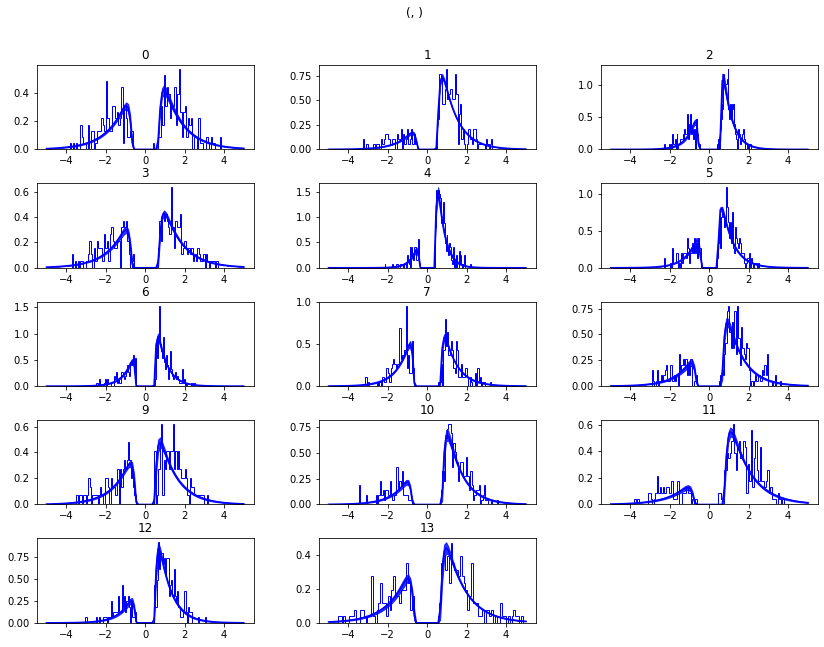

In [15]:
models_1[0].plot_posterior_predictive(figsize=(14, 10))

In [16]:
m_comb = kabuki.utils.concat_models(models_1) # combine four chains together

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

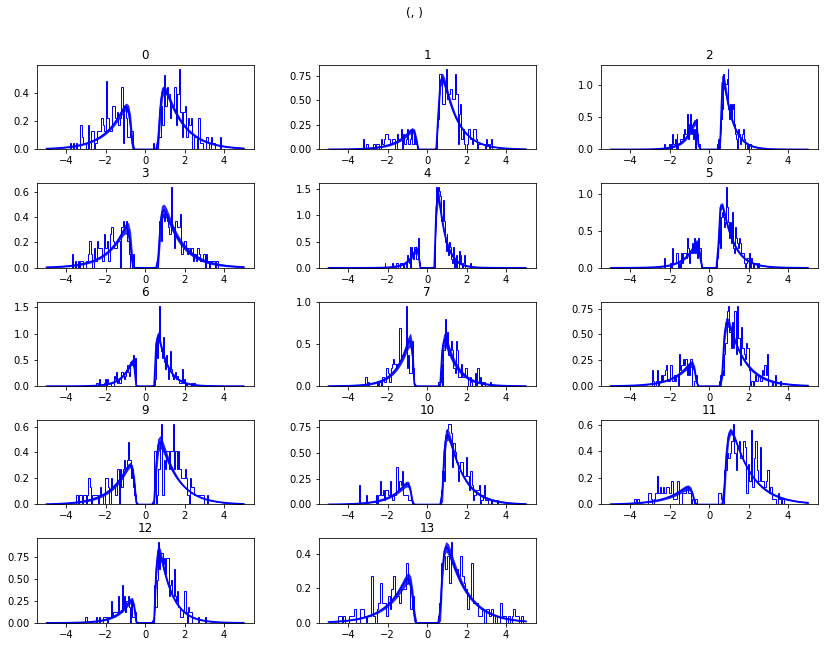

In [17]:
m_comb.plot_posterior_predictive(figsize=(14, 10))

### Model 2: `v` depends on stimulus

The original tutorial used code like this:

```
m_stim = hddm.HDDM(data, depends_on={'v': 'stim'})
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000)
```

Here we defined a function for stimulus coding and used parallel processing

In [18]:
def ms2(id, data=None, samples=None, burn=None, save_name="cavanagh2011_m2"): 

    print('running model%i'%id);
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    
    m = hddm.HDDM(data, depends_on={'v': 'stim'})
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # save the model data
    m.save(mname)
    
    return m

In [19]:
# note: the samples, burn, and chains can be changed too
models_2 = p_map(partial(ms2, data=data, samples=samples, burn=burn),
                 range(chains))

running model0

  0%|          | 0/4 [00:00<?, ?it/s]


No model attribute --> setting up standard HDDM
Set model to ddm
running model1
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)


running model2
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)


running model3
No model attribute --> setting up standard HDDM

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)


Set model to ddm

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.appen

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_el

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

In [ ]:
m_stim_all = kabuki.utils.concat_models(models_2) 

In [ ]:
v_WW, v_LL, v_WL = m_stim_all.nodes_db.node[['v(WW)', 'v(LL)', 'v(WL)']]
hddm.analyze.plot_posterior_nodes([v_WW, v_LL, v_WL])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
# plt.savefig('hddm_demo_fig_06.pdf')

In [ ]:
print("P(WW > LL) = ", (v_WW.trace() > v_LL.trace()).mean())
print("P(LL > WL) = ", (v_LL.trace() > v_WL.trace()).mean())

In [ ]:
print("Lumped model DIC: %f" % m1.dic)
print("Stimulus model DIC: %f" % m_stim_all.dic)

## Within-subject effects

In [ ]:
from patsy import dmatrix
dmatrix("C(stim, Treatment('WL'))", data.head(10))

The original code in the tutorial was:

```
m_within_subj = hddm.HDDMRegressor(data, "v ~ C(stim, Treatment('WL'))")
m_within_subj.sample(5000, burn=200)
```

Here we used four chains for parallel processing

In [ ]:
def run_m_reg(id, data=None, samples=None, burn=None, save_name="cavanagh2011_reg"): 
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    
    m = hddm.HDDMRegressor(data,
                           "v ~ C(stim, Treatment('WL'))")
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # it's neccessary to save the model data
    m.save(mname)
    
    return m

In [ ]:
m_reg_list = p_map(partial(run_m_reg, data=data, samples=5000, burn=1000),
                   range(chains))

In [ ]:
m_reg_all = kabuki.utils.concat_models(m_reg_list) 

In [ ]:
v_WL, v_LL, v_WW = m_reg_all.nodes_db.loc[["v_Intercept",
                                           "v_C(stim, Treatment('WL'))[T.LL]",
                                           "v_C(stim, Treatment('WL'))[T.WW]"], 'node']
hddm.analyze.plot_posterior_nodes([v_WL, v_LL, v_WW])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject drift-rate effects.')
# plt.savefig('hddm_demo_fig_07.pdf')

## Fitting regression models

In [ ]:
m_reg = hddm.HDDMRegressor(data[data.dbs == 0],
                           "a ~ theta:C(conf, Treatment('LC'))",
                           depends_on={'v': 'stim'})
m_reg.sample(5000, burn=1000)

In [ ]:
theta = m_reg.nodes_db.node["a_theta:C(conf, Treatment('LC'))[HC]"]
hddm.analyze.plot_posterior_nodes([theta], bins=20)
plt.xlabel('Theta coeffecient in ')
print("P(a_theta < 0) = ", (theta.trace() < 0).mean())

In [ ]:
m_reg_off = hddm.HDDMRegressor(data[data.dbs == 1],
                               "a ~ theta:C(conf, Treatment('LC'))",
                               depends_on={'v': 'stim'})
m_reg_off.sample(5000, burn=1000)

In [ ]:
theta = m_reg_off.nodes_db.node["a_theta:C(conf, Treatment('LC'))[HC]"]
hddm.analyze.plot_posterior_nodes([theta], bins=10)
print("P(a_theta > 0) = ", (theta.trace() > 0).mean())

## Dealing with outliers

This part of the tutorial seems outdated because, since 0.6.0, HDDM has a default setting `p_outliers=.05`. 

In [ ]:
outlier_data, params = hddm.generate.gen_rand_data(params={'a': 2, 't': .4, 'v': .5},
                                                   size=200, n_fast_outliers=10)

In [ ]:
m_no_outlier = hddm.HDDM(outlier_data)
m_no_outlier.sample(2000, burn=50)

In [ ]:
m_no_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')
# plt.savefig('hddm_demo_fig_10.pdf')

In [ ]:
m_outlier = hddm.HDDM(outlier_data, p_outlier=.05)
m_outlier.sample(2000, burn=20)

In [ ]:
m_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')
# plt.savefig('hddm_demo_fig_11.pdf')